In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cost-prediction-for-logistic-company-2023SAML-1413/train.csv
/kaggle/input/cost-prediction-for-logistic-company-2023SAML-1413/test.csv


In [4]:
df_train = pd.read_csv('/kaggle/input/cost-prediction-for-logistic-company-2023SAML-1413/train.csv')
df_test = pd.read_csv('/kaggle/input/cost-prediction-for-logistic-company-2023SAML-1413/test.csv')
df_train


,trip,date,dayPart,exWeatherTag,originLocation,destinationLocation,distance,type,weight,packageType,carrier,cost
0,t52712528,2017-09-06,night,NaN,S4,D7,2200,expedited,50,NaN,D,68.413152
1,t29859381,2017-10-21,night,NaN,S8,D1,1800,NaN,12,NaN,B,36.450649
2,t25702332,2017-07-15,night,NaN,S9,D5,2800,NaN,1,NaN,B,9.057939
3,t27713405,2017-10-22,day,NaN,S9,D7,3200,NaN,50,NaN,C,57.320087
4,t49439220,2019-12-11,day,snow,S9,D1,2000,NaN,43,NaN,B,77.263777
...,...,...,...,...,...,...,...,...,...,...,...,...
38994,t11845608590,2019-10-17,night,NaN,S3,D3,1200,NaN,3,NaN,B,14.987239
38995,t53557166488,2019-01-23,night,NaN,S4,D6,2000,NaN,6,NaN,B,33.214738
38996,t337474787136,2018-10-03,night,NaN,S8,D7,3000,NaN,24,NaN,B,45.172159
38997,t76488353326,2018-02-26,night,NaN,S8,D5,2600,NaN,31,NaN,B,47.541427


In [4]:
df_test

,trip,date,dayPart,exWeatherTag,originLocation,destinationLocation,distance,type,weight,packageType,carrier
0,t333282728025,2017-09-27,night,NaN,S2,D8,2000,NaN,50,NaN,C
1,t35583500660,2017-12-12,day,snow,S2,D1,600,NaN,22,NaN,A
2,t117664376784,2018-11-18,day,NaN,S7,D1,1600,expedited,30,NaN,D
3,t261320757828,2019-11-18,day,NaN,S5,D6,2200,NaN,32,NaN,B
4,t147086054909,2019-06-02,night,heat,S6,D7,2600,NaN,7,NaN,B
...,...,...,...,...,...,...,...,...,...,...,...
797,t353400176448,2017-10-26,day,NaN,S4,D1,1000,NaN,489,TT,C
798,t112945848426,2018-09-01,day,NaN,S8,D3,2200,NaN,12,NaN,B
799,t53097944970,2018-06-20,day,NaN,S9,D2,2200,NaN,9,NaN,B
800,t127986960246,2019-01-13,night,NaN,S3,D3,1200,expedited,11,NaN,D


In [5]:
df_train_copy = df_train.copy()
df_train_copy

,trip,date,dayPart,exWeatherTag,originLocation,destinationLocation,distance,type,weight,packageType,carrier,cost
0,t52712528,2017-09-06,night,NaN,S4,D7,2200,expedited,50,NaN,D,68.413152
1,t29859381,2017-10-21,night,NaN,S8,D1,1800,NaN,12,NaN,B,36.450649
2,t25702332,2017-07-15,night,NaN,S9,D5,2800,NaN,1,NaN,B,9.057939
3,t27713405,2017-10-22,day,NaN,S9,D7,3200,NaN,50,NaN,C,57.320087
4,t49439220,2019-12-11,day,snow,S9,D1,2000,NaN,43,NaN,B,77.263777
...,...,...,...,...,...,...,...,...,...,...,...,...
38994,t11845608590,2019-10-17,night,NaN,S3,D3,1200,NaN,3,NaN,B,14.987239
38995,t53557166488,2019-01-23,night,NaN,S4,D6,2000,NaN,6,NaN,B,33.214738
38996,t337474787136,2018-10-03,night,NaN,S8,D7,3000,NaN,24,NaN,B,45.172159
38997,t76488353326,2018-02-26,night,NaN,S8,D5,2600,NaN,31,NaN,B,47.541427


In [6]:
df_test_copy = df_test.copy()

In [7]:
df_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38999 entries, 0 to 38998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   trip                 38999 non-null  object 
 1   date                 38999 non-null  object 
 2   dayPart              38999 non-null  object 
 3   exWeatherTag         4882 non-null   object 
 4   originLocation       38999 non-null  object 
 5   destinationLocation  38999 non-null  object 
 6   distance             38999 non-null  int64  
 7   type                 3748 non-null   object 
 8   weight               38999 non-null  int64  
 9   packageType          2500 non-null   object 
 10  carrier              38999 non-null  object 
 11  cost                 38999 non-null  float64
dtypes: float64(1), int64(2), object(9)
memory usage: 3.6+ MB


In [8]:
df_test_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   trip                 802 non-null    object
 1   date                 802 non-null    object
 2   dayPart              802 non-null    object
 3   exWeatherTag         101 non-null    object
 4   originLocation       802 non-null    object
 5   destinationLocation  802 non-null    object
 6   distance             802 non-null    int64 
 7   type                 73 non-null     object
 8   weight               802 non-null    int64 
 9   packageType          52 non-null     object
 10  carrier              802 non-null    object
dtypes: int64(2), object(9)
memory usage: 69.0+ KB


In [9]:
df_train_copy[['trip','cost']]

,trip,cost
0,t52712528,68.413152
1,t29859381,36.450649
2,t25702332,9.057939
3,t27713405,57.320087
4,t49439220,77.263777
...,...,...
38994,t11845608590,14.987239
38995,t53557166488,33.214738
38996,t337474787136,45.172159
38997,t76488353326,47.541427


/tmp/ipykernel_303/2817020736.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_train.corr()


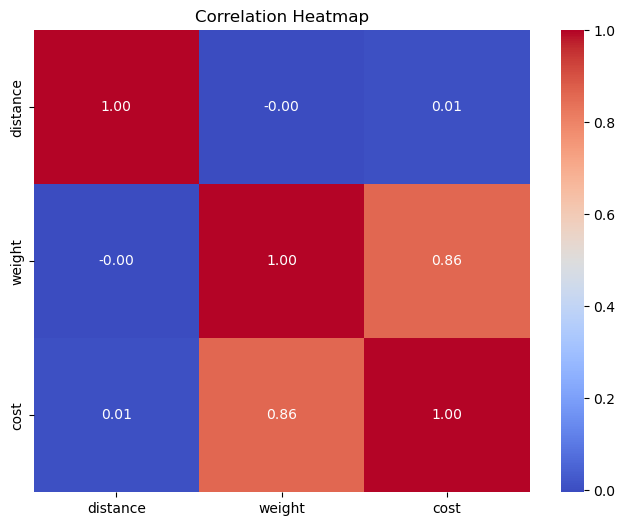

In [10]:
#df_train
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df_train.corr()

# Create the correlation heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [11]:
#we can create new variable multiplying distance and weight

In [12]:
non_numeric_features = ['dayPart', 'originLocation',
                   'destinationLocation','carrier' ]
df_train[non_numeric_features]

,dayPart,originLocation,destinationLocation,carrier
0,night,S4,D7,D
1,night,S8,D1,B
2,night,S9,D5,B
3,day,S9,D7,C
4,day,S9,D1,B
...,...,...,...,...
38994,night,S3,D3,B
38995,night,S4,D6,B
38996,night,S8,D7,B
38997,night,S8,D5,B


In [13]:
df_train

,trip,date,dayPart,exWeatherTag,originLocation,destinationLocation,distance,type,weight,packageType,carrier,cost
0,t52712528,2017-09-06,night,NaN,S4,D7,2200,expedited,50,NaN,D,68.413152
1,t29859381,2017-10-21,night,NaN,S8,D1,1800,NaN,12,NaN,B,36.450649
2,t25702332,2017-07-15,night,NaN,S9,D5,2800,NaN,1,NaN,B,9.057939
3,t27713405,2017-10-22,day,NaN,S9,D7,3200,NaN,50,NaN,C,57.320087
4,t49439220,2019-12-11,day,snow,S9,D1,2000,NaN,43,NaN,B,77.263777
...,...,...,...,...,...,...,...,...,...,...,...,...
38994,t11845608590,2019-10-17,night,NaN,S3,D3,1200,NaN,3,NaN,B,14.987239
38995,t53557166488,2019-01-23,night,NaN,S4,D6,2000,NaN,6,NaN,B,33.214738
38996,t337474787136,2018-10-03,night,NaN,S8,D7,3000,NaN,24,NaN,B,45.172159
38997,t76488353326,2018-02-26,night,NaN,S8,D5,2600,NaN,31,NaN,B,47.541427


In [14]:
non_numeric_features = ['dayPart', 'originLocation',
                   'destinationLocation','carrier']
df_train_encoded = pd.get_dummies(df_train[non_numeric_features])
df_test_encoded = pd.get_dummies(df_test[non_numeric_features])

# Drop the original non-numeric features from the original DataFrame
df_train.drop(non_numeric_features, axis=1, inplace=True)
df_test.drop(non_numeric_features, axis=1, inplace=True)

# Merge the encoded features with the original DataFrame
df_train = pd.concat([df_train, df_train_encoded], axis=1)
df_test = pd.concat([df_test, df_test_encoded], axis=1)


In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38999 entries, 0 to 38998
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trip                    38999 non-null  object 
 1   date                    38999 non-null  object 
 2   exWeatherTag            4882 non-null   object 
 3   distance                38999 non-null  int64  
 4   type                    3748 non-null   object 
 5   weight                  38999 non-null  int64  
 6   packageType             2500 non-null   object 
 7   cost                    38999 non-null  float64
 8   dayPart_day             38999 non-null  uint8  
 9   dayPart_night           38999 non-null  uint8  
 10  originLocation_S1       38999 non-null  uint8  
 11  originLocation_S2       38999 non-null  uint8  
 12  originLocation_S3       38999 non-null  uint8  
 13  originLocation_S4       38999 non-null  uint8  
 14  originLocation_S5       38999 non-null

In [16]:
# Drop specific columns from the encoded DataFrame if needed
#columns_to_drop = ['originLocation_XYZ', 'destinationLocation_ABC']  # Add the column names you want to drop
#encoded_features.drop(columns=columns_to_drop, axis=1, inplace=True)


In [17]:
'''from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()
# Initialize the OneHotEncoder object
onehot_encoder = OneHotEncoder()
non_numeric_features = ['dayPart', 'originLocation',
                   'destinationLocation','carrier']
df_train_encoded = pd.get_dummies(df_train, columns=non_numeric_features)
df_test_encoded = pd.get_dummies(df_test, columns=non_numeric_features)
#for column in non_numeric_features:
   # df_train[column] = onehot_encoder.fit_transform(df_train[column])
  #  df_train[column] = pd.get_dummies(df_train, columns=column)
  #  df_test[column] = pd.get_dummies(df_test, columns=column)
   # df_test[column] = onehot_encoder.fit_transform(df_test[column])
# Merge the one-hot encoded DataFrame 'df_train_encoded' back to the original DataFrame 'df_train'
# Drop the previous non-encoded features

#df_train = pd.concat([df_train, df_train_encoded], axis=1)

#df_test = pd.concat([df_test, df_test_encoded], axis=1)  '''
            

"from sklearn.preprocessing import LabelEncoder\nfrom sklearn.preprocessing import OneHotEncoder\n\n# Create a LabelEncoder object\nlabel_encoder = LabelEncoder()\n# Initialize the OneHotEncoder object\nonehot_encoder = OneHotEncoder()\nnon_numeric_features = ['dayPart', 'originLocation',\n                   'destinationLocation','carrier']\ndf_train_encoded = pd.get_dummies(df_train, columns=non_numeric_features)\ndf_test_encoded = pd.get_dummies(df_test, columns=non_numeric_features)\n#for column in non_numeric_features:\n   # df_train[column] = onehot_encoder.fit_transform(df_train[column])\n  #  df_train[column] = pd.get_dummies(df_train, columns=column)\n  #  df_test[column] = pd.get_dummies(df_test, columns=column)\n   # df_test[column] = onehot_encoder.fit_transform(df_test[column])\n# Merge the one-hot encoded DataFrame 'df_train_encoded' back to the original DataFrame 'df_train'\n# Drop the previous non-encoded features\n\n#df_train = pd.concat([df_train, df_train_encoded], ax

In [18]:
df_train_encoded

,dayPart_day,dayPart_night,originLocation_S1,originLocation_S2,originLocation_S3,originLocation_S4,originLocation_S5,originLocation_S6,originLocation_S7,originLocation_S8,...,destinationLocation_D4,destinationLocation_D5,destinationLocation_D6,destinationLocation_D7,destinationLocation_D8,destinationLocation_D9,carrier_A,carrier_B,carrier_C,carrier_D
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38994,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
38995,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
38996,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
38997,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0


In [19]:
df_test

,trip,date,exWeatherTag,distance,type,weight,packageType,dayPart_day,dayPart_night,originLocation_S1,...,destinationLocation_D4,destinationLocation_D5,destinationLocation_D6,destinationLocation_D7,destinationLocation_D8,destinationLocation_D9,carrier_A,carrier_B,carrier_C,carrier_D
0,t333282728025,2017-09-27,NaN,2000,NaN,50,NaN,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,t35583500660,2017-12-12,snow,600,NaN,22,NaN,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,t117664376784,2018-11-18,NaN,1600,expedited,30,NaN,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,t261320757828,2019-11-18,NaN,2200,NaN,32,NaN,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,t147086054909,2019-06-02,heat,2600,NaN,7,NaN,0,1,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,t353400176448,2017-10-26,NaN,1000,NaN,489,TT,1,0,0,...,0,0,0,0,0,0,0,0,1,0
798,t112945848426,2018-09-01,NaN,2200,NaN,12,NaN,1,0,0,...,0,0,0,0,0,0,0,1,0,0
799,t53097944970,2018-06-20,NaN,2200,NaN,9,NaN,1,0,0,...,0,0,0,0,0,0,0,1,0,0
800,t127986960246,2019-01-13,NaN,1200,expedited,11,NaN,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
df_train

,trip,date,exWeatherTag,distance,type,weight,packageType,cost,dayPart_day,dayPart_night,...,destinationLocation_D4,destinationLocation_D5,destinationLocation_D6,destinationLocation_D7,destinationLocation_D8,destinationLocation_D9,carrier_A,carrier_B,carrier_C,carrier_D
0,t52712528,2017-09-06,NaN,2200,expedited,50,NaN,68.413152,0,1,...,0,0,0,1,0,0,0,0,0,1
1,t29859381,2017-10-21,NaN,1800,NaN,12,NaN,36.450649,0,1,...,0,0,0,0,0,0,0,1,0,0
2,t25702332,2017-07-15,NaN,2800,NaN,1,NaN,9.057939,0,1,...,0,1,0,0,0,0,0,1,0,0
3,t27713405,2017-10-22,NaN,3200,NaN,50,NaN,57.320087,1,0,...,0,0,0,1,0,0,0,0,1,0
4,t49439220,2019-12-11,snow,2000,NaN,43,NaN,77.263777,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38994,t11845608590,2019-10-17,NaN,1200,NaN,3,NaN,14.987239,0,1,...,0,0,0,0,0,0,0,1,0,0
38995,t53557166488,2019-01-23,NaN,2000,NaN,6,NaN,33.214738,0,1,...,0,0,1,0,0,0,0,1,0,0
38996,t337474787136,2018-10-03,NaN,3000,NaN,24,NaN,45.172159,0,1,...,0,0,0,1,0,0,0,1,0,0
38997,t76488353326,2018-02-26,NaN,2600,NaN,31,NaN,47.541427,0,1,...,0,1,0,0,0,0,0,1,0,0


In [21]:
#normalize 
df_train


,trip,date,exWeatherTag,distance,type,weight,packageType,cost,dayPart_day,dayPart_night,...,destinationLocation_D4,destinationLocation_D5,destinationLocation_D6,destinationLocation_D7,destinationLocation_D8,destinationLocation_D9,carrier_A,carrier_B,carrier_C,carrier_D
0,t52712528,2017-09-06,NaN,2200,expedited,50,NaN,68.413152,0,1,...,0,0,0,1,0,0,0,0,0,1
1,t29859381,2017-10-21,NaN,1800,NaN,12,NaN,36.450649,0,1,...,0,0,0,0,0,0,0,1,0,0
2,t25702332,2017-07-15,NaN,2800,NaN,1,NaN,9.057939,0,1,...,0,1,0,0,0,0,0,1,0,0
3,t27713405,2017-10-22,NaN,3200,NaN,50,NaN,57.320087,1,0,...,0,0,0,1,0,0,0,0,1,0
4,t49439220,2019-12-11,snow,2000,NaN,43,NaN,77.263777,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38994,t11845608590,2019-10-17,NaN,1200,NaN,3,NaN,14.987239,0,1,...,0,0,0,0,0,0,0,1,0,0
38995,t53557166488,2019-01-23,NaN,2000,NaN,6,NaN,33.214738,0,1,...,0,0,1,0,0,0,0,1,0,0
38996,t337474787136,2018-10-03,NaN,3000,NaN,24,NaN,45.172159,0,1,...,0,0,0,1,0,0,0,1,0,0
38997,t76488353326,2018-02-26,NaN,2600,NaN,31,NaN,47.541427,0,1,...,0,1,0,0,0,0,0,1,0,0


In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38999 entries, 0 to 38998
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trip                    38999 non-null  object 
 1   date                    38999 non-null  object 
 2   exWeatherTag            4882 non-null   object 
 3   distance                38999 non-null  int64  
 4   type                    3748 non-null   object 
 5   weight                  38999 non-null  int64  
 6   packageType             2500 non-null   object 
 7   cost                    38999 non-null  float64
 8   dayPart_day             38999 non-null  uint8  
 9   dayPart_night           38999 non-null  uint8  
 10  originLocation_S1       38999 non-null  uint8  
 11  originLocation_S2       38999 non-null  uint8  
 12  originLocation_S3       38999 non-null  uint8  
 13  originLocation_S4       38999 non-null  uint8  
 14  originLocation_S5       38999 non-null

In [23]:
df_train['date'] = pd.to_datetime(df_train['date'])
df_test['date'] = pd.to_datetime(df_test['date'])

In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38999 entries, 0 to 38998
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trip                    38999 non-null  object        
 1   date                    38999 non-null  datetime64[ns]
 2   exWeatherTag            4882 non-null   object        
 3   distance                38999 non-null  int64         
 4   type                    3748 non-null   object        
 5   weight                  38999 non-null  int64         
 6   packageType             2500 non-null   object        
 7   cost                    38999 non-null  float64       
 8   dayPart_day             38999 non-null  uint8         
 9   dayPart_night           38999 non-null  uint8         
 10  originLocation_S1       38999 non-null  uint8         
 11  originLocation_S2       38999 non-null  uint8         
 12  originLocation_S3       38999 non-null  uint8 

In [25]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trip                    802 non-null    object        
 1   date                    802 non-null    datetime64[ns]
 2   exWeatherTag            101 non-null    object        
 3   distance                802 non-null    int64         
 4   type                    73 non-null     object        
 5   weight                  802 non-null    int64         
 6   packageType             52 non-null     object        
 7   dayPart_day             802 non-null    uint8         
 8   dayPart_night           802 non-null    uint8         
 9   originLocation_S1       802 non-null    uint8         
 10  originLocation_S2       802 non-null    uint8         
 11  originLocation_S3       802 non-null    uint8         
 12  originLocation_S4       802 non-null    uint8     

In [26]:
df_train

,trip,date,exWeatherTag,distance,type,weight,packageType,cost,dayPart_day,dayPart_night,...,destinationLocation_D4,destinationLocation_D5,destinationLocation_D6,destinationLocation_D7,destinationLocation_D8,destinationLocation_D9,carrier_A,carrier_B,carrier_C,carrier_D
0,t52712528,2017-09-06,NaN,2200,expedited,50,NaN,68.413152,0,1,...,0,0,0,1,0,0,0,0,0,1
1,t29859381,2017-10-21,NaN,1800,NaN,12,NaN,36.450649,0,1,...,0,0,0,0,0,0,0,1,0,0
2,t25702332,2017-07-15,NaN,2800,NaN,1,NaN,9.057939,0,1,...,0,1,0,0,0,0,0,1,0,0
3,t27713405,2017-10-22,NaN,3200,NaN,50,NaN,57.320087,1,0,...,0,0,0,1,0,0,0,0,1,0
4,t49439220,2019-12-11,snow,2000,NaN,43,NaN,77.263777,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38994,t11845608590,2019-10-17,NaN,1200,NaN,3,NaN,14.987239,0,1,...,0,0,0,0,0,0,0,1,0,0
38995,t53557166488,2019-01-23,NaN,2000,NaN,6,NaN,33.214738,0,1,...,0,0,1,0,0,0,0,1,0,0
38996,t337474787136,2018-10-03,NaN,3000,NaN,24,NaN,45.172159,0,1,...,0,0,0,1,0,0,0,1,0,0
38997,t76488353326,2018-02-26,NaN,2600,NaN,31,NaN,47.541427,0,1,...,0,1,0,0,0,0,0,1,0,0


In [27]:
df_train.columns

Index(['trip', 'date', 'exWeatherTag', 'distance', 'type', 'weight',
       'packageType', 'cost', 'dayPart_day', 'dayPart_night',
       'originLocation_S1', 'originLocation_S2', 'originLocation_S3',
       'originLocation_S4', 'originLocation_S5', 'originLocation_S6',
       'originLocation_S7', 'originLocation_S8', 'originLocation_S9',
       'destinationLocation_D1', 'destinationLocation_D2',
       'destinationLocation_D3', 'destinationLocation_D4',
       'destinationLocation_D5', 'destinationLocation_D6',
       'destinationLocation_D7', 'destinationLocation_D8',
       'destinationLocation_D9', 'carrier_A', 'carrier_B', 'carrier_C',
       'carrier_D'],
      dtype='object')

In [28]:
columns_to_train = ['date', 'distance', 'weight'
        , 'dayPart_day', 'dayPart_night',
       'originLocation_S1', 'originLocation_S2', 'originLocation_S3',
       'originLocation_S4', 'originLocation_S5', 'originLocation_S6',
       'originLocation_S7', 'originLocation_S8', 'originLocation_S9',
       'destinationLocation_D1', 'destinationLocation_D2',
       'destinationLocation_D3', 'destinationLocation_D4',
       'destinationLocation_D5', 'destinationLocation_D6',
       'destinationLocation_D7', 'destinationLocation_D8',
       'destinationLocation_D9', 'carrier_A', 'carrier_B', 'carrier_C',
       'carrier_D']
df_train[columns_to_train]

,date,distance,weight,dayPart_day,dayPart_night,originLocation_S1,originLocation_S2,originLocation_S3,originLocation_S4,originLocation_S5,...,destinationLocation_D4,destinationLocation_D5,destinationLocation_D6,destinationLocation_D7,destinationLocation_D8,destinationLocation_D9,carrier_A,carrier_B,carrier_C,carrier_D
0,2017-09-06,2200,50,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,2017-10-21,1800,12,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2017-07-15,2800,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,2017-10-22,3200,50,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,2019-12-11,2000,43,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38994,2019-10-17,1200,3,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
38995,2019-01-23,2000,6,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
38996,2018-10-03,3000,24,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
38997,2018-02-26,2600,31,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [29]:
df_test[columns_to_train]

,date,distance,weight,dayPart_day,dayPart_night,originLocation_S1,originLocation_S2,originLocation_S3,originLocation_S4,originLocation_S5,...,destinationLocation_D4,destinationLocation_D5,destinationLocation_D6,destinationLocation_D7,destinationLocation_D8,destinationLocation_D9,carrier_A,carrier_B,carrier_C,carrier_D
0,2017-09-27,2000,50,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,2017-12-12,600,22,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2018-11-18,1600,30,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2019-11-18,2200,32,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
4,2019-06-02,2600,7,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,2017-10-26,1000,489,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
798,2018-09-01,2200,12,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
799,2018-06-20,2200,9,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
800,2019-01-13,1200,11,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
from sklearn.preprocessing import MinMaxScaler
#normalize distance , weight 
# Create the MinMaxScaler
scaler = MinMaxScaler()

# Select the columns you want to scale
columns_to_scale = ['distance', 'weight']

# Fit the scaler to the selected columns and transform the data
scaled_data = scaler.fit_transform(df_train[columns_to_scale])
#scaled_data
# Create a new DataFrame with the scaled columns
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)
#scaled_df
# Merge the scaled columns with the original DataFrame
df_scaled_train = pd.concat([df_train.drop(columns_to_scale, axis=1), scaled_df], axis=1)
df_train

,trip,date,exWeatherTag,distance,type,weight,packageType,cost,dayPart_day,dayPart_night,...,destinationLocation_D4,destinationLocation_D5,destinationLocation_D6,destinationLocation_D7,destinationLocation_D8,destinationLocation_D9,carrier_A,carrier_B,carrier_C,carrier_D
0,t52712528,2017-09-06,NaN,2200,expedited,50,NaN,68.413152,0,1,...,0,0,0,1,0,0,0,0,0,1
1,t29859381,2017-10-21,NaN,1800,NaN,12,NaN,36.450649,0,1,...,0,0,0,0,0,0,0,1,0,0
2,t25702332,2017-07-15,NaN,2800,NaN,1,NaN,9.057939,0,1,...,0,1,0,0,0,0,0,1,0,0
3,t27713405,2017-10-22,NaN,3200,NaN,50,NaN,57.320087,1,0,...,0,0,0,1,0,0,0,0,1,0
4,t49439220,2019-12-11,snow,2000,NaN,43,NaN,77.263777,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38994,t11845608590,2019-10-17,NaN,1200,NaN,3,NaN,14.987239,0,1,...,0,0,0,0,0,0,0,1,0,0
38995,t53557166488,2019-01-23,NaN,2000,NaN,6,NaN,33.214738,0,1,...,0,0,1,0,0,0,0,1,0,0
38996,t337474787136,2018-10-03,NaN,3000,NaN,24,NaN,45.172159,0,1,...,0,0,0,1,0,0,0,1,0,0
38997,t76488353326,2018-02-26,NaN,2600,NaN,31,NaN,47.541427,0,1,...,0,1,0,0,0,0,0,1,0,0


In [31]:
df_test

,trip,date,exWeatherTag,distance,type,weight,packageType,dayPart_day,dayPart_night,originLocation_S1,...,destinationLocation_D4,destinationLocation_D5,destinationLocation_D6,destinationLocation_D7,destinationLocation_D8,destinationLocation_D9,carrier_A,carrier_B,carrier_C,carrier_D
0,t333282728025,2017-09-27,NaN,2000,NaN,50,NaN,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,t35583500660,2017-12-12,snow,600,NaN,22,NaN,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,t117664376784,2018-11-18,NaN,1600,expedited,30,NaN,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,t261320757828,2019-11-18,NaN,2200,NaN,32,NaN,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,t147086054909,2019-06-02,heat,2600,NaN,7,NaN,0,1,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,t353400176448,2017-10-26,NaN,1000,NaN,489,TT,1,0,0,...,0,0,0,0,0,0,0,0,1,0
798,t112945848426,2018-09-01,NaN,2200,NaN,12,NaN,1,0,0,...,0,0,0,0,0,0,0,1,0,0
799,t53097944970,2018-06-20,NaN,2200,NaN,9,NaN,1,0,0,...,0,0,0,0,0,0,0,1,0,0
800,t127986960246,2019-01-13,NaN,1200,expedited,11,NaN,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [32]:
columns_to_train = ['distance', 'weight'
        , 'dayPart_day', 'dayPart_night',
       'originLocation_S1', 'originLocation_S2', 'originLocation_S3',
       'originLocation_S4', 'originLocation_S5', 'originLocation_S6',
       'originLocation_S7', 'originLocation_S8', 'originLocation_S9',
       'destinationLocation_D1', 'destinationLocation_D2',
       'destinationLocation_D3', 'destinationLocation_D4',
       'destinationLocation_D5', 'destinationLocation_D6',
       'destinationLocation_D7', 'destinationLocation_D8',
       'destinationLocation_D9', 'carrier_A', 'carrier_B', 'carrier_C',
       'carrier_D']
df_train[columns_to_train]

,distance,weight,dayPart_day,dayPart_night,originLocation_S1,originLocation_S2,originLocation_S3,originLocation_S4,originLocation_S5,originLocation_S6,...,destinationLocation_D4,destinationLocation_D5,destinationLocation_D6,destinationLocation_D7,destinationLocation_D8,destinationLocation_D9,carrier_A,carrier_B,carrier_C,carrier_D
0,2200,50,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1800,12,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2800,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,3200,50,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,2000,43,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38994,1200,3,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
38995,2000,6,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
38996,3000,24,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
38997,2600,31,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [55]:
df_train.value_counts()

trip           date        exWeatherTag  distance  type       weight  packageType  cost        dayPart_day  dayPart_night  originLocation_S1  originLocation_S2  originLocation_S3  originLocation_S4  originLocation_S5  originLocation_S6  originLocation_S7  originLocation_S8  originLocation_S9  destinationLocation_D1  destinationLocation_D2  destinationLocation_D3  destinationLocation_D4  destinationLocation_D5  destinationLocation_D6  destinationLocation_D7  destinationLocation_D8  destinationLocation_D9  carrier_A  carrier_B  carrier_C  carrier_D
t111470630025  2018-12-06  snow          2000      expedited  456     TT           138.031596  0            1              0                  0                  0                  0                  0                  1                  0                  0                  0                  0                       0                       0                       1                       0                       0                       0        

In [33]:
df_test[columns_to_train]

,distance,weight,dayPart_day,dayPart_night,originLocation_S1,originLocation_S2,originLocation_S3,originLocation_S4,originLocation_S5,originLocation_S6,...,destinationLocation_D4,destinationLocation_D5,destinationLocation_D6,destinationLocation_D7,destinationLocation_D8,destinationLocation_D9,carrier_A,carrier_B,carrier_C,carrier_D
0,2000,50,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,600,22,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1600,30,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2200,32,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,2600,7,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,1000,489,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
798,2200,12,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
799,2200,9,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
800,1200,11,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [34]:
#with scaling
columns_to_scale = ['distance', 'weight']
scaled_test_data = scaler.fit_transform(df_test[columns_to_scale])

# Create a new DataFrame with the scaled columns
scaled_test_data = pd.DataFrame(scaled_test_data, columns=columns_to_scale)

# Merge the scaled columns with the original DataFrame
merged_test_df = pd.concat([df_test.drop(columns_to_scale, axis=1), scaled_test_data], axis=1)


In [35]:
merged_test_df

,trip,date,exWeatherTag,type,packageType,dayPart_day,dayPart_night,originLocation_S1,originLocation_S2,originLocation_S3,...,destinationLocation_D6,destinationLocation_D7,destinationLocation_D8,destinationLocation_D9,carrier_A,carrier_B,carrier_C,carrier_D,distance,weight
0,t333282728025,2017-09-27,NaN,NaN,NaN,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0.5000,0.099391
1,t35583500660,2017-12-12,snow,NaN,NaN,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0.0625,0.042596
2,t117664376784,2018-11-18,NaN,expedited,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0.3750,0.058824
3,t261320757828,2019-11-18,NaN,NaN,NaN,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0.5625,0.062880
4,t147086054909,2019-06-02,heat,NaN,NaN,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0.6875,0.012170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,t353400176448,2017-10-26,NaN,NaN,TT,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0.1875,0.989858
798,t112945848426,2018-09-01,NaN,NaN,NaN,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0.5625,0.022312
799,t53097944970,2018-06-20,NaN,NaN,NaN,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0.5625,0.016227
800,t127986960246,2019-01-13,NaN,expedited,NaN,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0.2500,0.020284


In [36]:
#without scaling
df_test

,trip,date,exWeatherTag,distance,type,weight,packageType,dayPart_day,dayPart_night,originLocation_S1,...,destinationLocation_D4,destinationLocation_D5,destinationLocation_D6,destinationLocation_D7,destinationLocation_D8,destinationLocation_D9,carrier_A,carrier_B,carrier_C,carrier_D
0,t333282728025,2017-09-27,NaN,2000,NaN,50,NaN,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,t35583500660,2017-12-12,snow,600,NaN,22,NaN,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,t117664376784,2018-11-18,NaN,1600,expedited,30,NaN,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,t261320757828,2019-11-18,NaN,2200,NaN,32,NaN,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,t147086054909,2019-06-02,heat,2600,NaN,7,NaN,0,1,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,t353400176448,2017-10-26,NaN,1000,NaN,489,TT,1,0,0,...,0,0,0,0,0,0,0,0,1,0
798,t112945848426,2018-09-01,NaN,2200,NaN,12,NaN,1,0,0,...,0,0,0,0,0,0,0,1,0,0
799,t53097944970,2018-06-20,NaN,2200,NaN,9,NaN,1,0,0,...,0,0,0,0,0,0,0,1,0,0
800,t127986960246,2019-01-13,NaN,1200,expedited,11,NaN,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [37]:
df_test[columns_to_train]

,distance,weight,dayPart_day,dayPart_night,originLocation_S1,originLocation_S2,originLocation_S3,originLocation_S4,originLocation_S5,originLocation_S6,...,destinationLocation_D4,destinationLocation_D5,destinationLocation_D6,destinationLocation_D7,destinationLocation_D8,destinationLocation_D9,carrier_A,carrier_B,carrier_C,carrier_D
0,2000,50,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,600,22,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1600,30,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2200,32,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,2600,7,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,1000,489,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
798,2200,12,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
799,2200,9,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
800,1200,11,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [38]:
merged_test_df[columns_to_train]

,distance,weight,dayPart_day,dayPart_night,originLocation_S1,originLocation_S2,originLocation_S3,originLocation_S4,originLocation_S5,originLocation_S6,...,destinationLocation_D4,destinationLocation_D5,destinationLocation_D6,destinationLocation_D7,destinationLocation_D8,destinationLocation_D9,carrier_A,carrier_B,carrier_C,carrier_D
0,0.5000,0.099391,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.0625,0.042596,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.3750,0.058824,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.5625,0.062880,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,0.6875,0.012170,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,0.1875,0.989858,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
798,0.5625,0.022312,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
799,0.5625,0.016227,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
800,0.2500,0.020284,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [40]:
x_train = df_train[columns_to_train]
y_train = df_train['cost']
#scaled
#x_test = merged_test_df[columns_to_train]
#without scaling
x_test = df_test[columns_to_train]

In [41]:
x_train

,distance,weight,dayPart_day,dayPart_night,originLocation_S1,originLocation_S2,originLocation_S3,originLocation_S4,originLocation_S5,originLocation_S6,...,destinationLocation_D4,destinationLocation_D5,destinationLocation_D6,destinationLocation_D7,destinationLocation_D8,destinationLocation_D9,carrier_A,carrier_B,carrier_C,carrier_D
0,2200,50,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1800,12,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2800,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,3200,50,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,2000,43,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38994,1200,3,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
38995,2000,6,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
38996,3000,24,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
38997,2600,31,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [42]:
y_train

0        68.413152
1        36.450649
2         9.057939
3        57.320087
4        77.263777
           ...    
38994    14.987239
38995    33.214738
38996    45.172159
38997    47.541427
38998    68.054098
Name: cost, Length: 38999, dtype: float64

In [43]:
x_test


,distance,weight,dayPart_day,dayPart_night,originLocation_S1,originLocation_S2,originLocation_S3,originLocation_S4,originLocation_S5,originLocation_S6,...,destinationLocation_D4,destinationLocation_D5,destinationLocation_D6,destinationLocation_D7,destinationLocation_D8,destinationLocation_D9,carrier_A,carrier_B,carrier_C,carrier_D
0,2000,50,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,600,22,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1600,30,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2200,32,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,2600,7,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,1000,489,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
798,2200,12,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
799,2200,9,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
800,1200,11,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
'''import xgboost as xgb
from sklearn.model_selection import GridSearchCV
model = xgb.XGBRegressor()

# Define hyperparameter grid for Grid Search
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Create Grid Search object with cross-validation (5 folds in this example)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the Grid Search object to the training data
grid_search.fit(x_train, y_train)

#grid_search.fit(x_train, y_train)

# Get the best hyperparameters and model
#best_params = grid_search.best_params_
#best_model = grid_search.best_estimator_

# Train the model with the best hyperparameters
#best_model.fit(x_train, y_train)

# Make predictions using the best model
#predictions = best_model.predict() '''

In [ ]:
'''import xgboost as xgb
from sklearn.model_selection import GridSearchCV
# Grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Train the model with the best hyperparameters
best_model.fit(X, y)

# Make predictions using the best model
predictions = best_model.predict(X) '''

In [ ]:
# Assuming you want to use Linear Regression
from sklearn.linear_model import LinearRegression
#model = LinearRegression()
#model.fit(x_train, y_train)

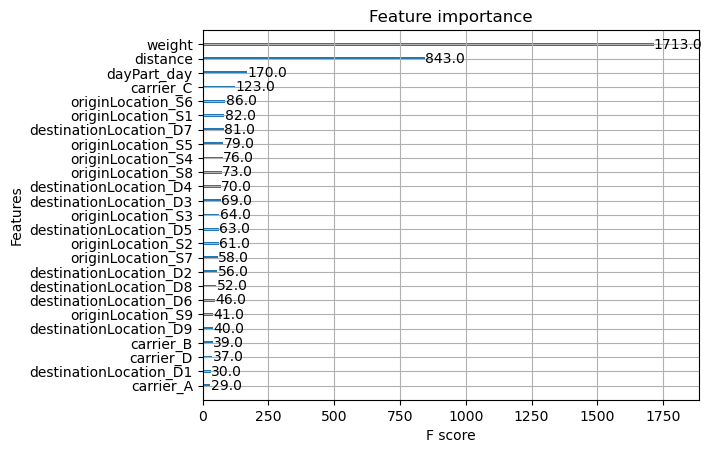

In [44]:
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
#model = RandomForestRegressor() #4.29392 V5
model = xgb.XGBRegressor()  # 4.03773 V4
#model = DecisionTreeRegressor() # 5.68817 V6
#model = LGBMRegressor() # 4.63865 V7
#model = SVR()  #127.34847 V8
model.fit(x_train, y_train)
xgb.plot_importance(model)
plt.show()


In [45]:
y_pred = model.predict(x_test)

In [46]:
y_pred

array([  61.05916  ,   30.856123 ,   62.78144  ,   69.752525 ,
         33.425056 ,   38.93187  ,    9.211807 ,   30.118671 ,
         74.56844  ,   44.710377 ,   52.111656 ,   29.364128 ,
         75.06603  ,   12.970649 ,   47.581146 ,   71.70706  ,
        668.92004  ,   45.328087 ,   70.53196  ,   41.666294 ,
         75.256805 ,   62.908714 ,   25.067316 ,   37.963245 ,
         40.714584 ,    8.933701 ,   66.7787   ,   23.38126  ,
         21.389544 ,   34.02612  ,   89.141045 ,   46.645054 ,
         33.833263 , 1175.5446   ,   32.837456 ,    9.349563 ,
         46.792152 ,   46.083508 ,   47.548355 ,   63.14437  ,
         75.612526 ,   49.515602 ,  170.71353  ,   73.47721  ,
         74.55853  ,   75.59351  ,   73.83662  ,  327.23358  ,
         70.738846 ,   47.166527 ,   60.047848 ,   75.51752  ,
         36.526234 ,   70.75401  ,   40.4779   ,   70.39389  ,
         41.148888 ,   45.561832 ,    7.6756577,   69.68253  ,
         71.625114 ,   38.83056  ,   70.92933  ,   67.2

In [47]:
df_test['cost'] = y_pred

In [48]:
submit = df_test[['trip','cost']]
submit

,trip,cost
0,t333282728025,61.059158
1,t35583500660,30.856123
2,t117664376784,62.781441
3,t261320757828,69.752525
4,t147086054909,33.425056
...,...,...
797,t353400176448,1720.191528
798,t112945848426,38.218666
799,t53097944970,35.753868
800,t127986960246,62.755497


In [54]:
csv_filename = 'submission.csv'
submit.to_csv(csv_filename, index = False)